<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Kalman filter Ball Bounce example
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Та бүхэндээ энэ өдрийн мэнд хүргэе. Саяхан болсон явдалаас урьд нь ойлгох гээд орхисон байсан асуудлыг шийдэхээр энэхүү Python 2.7.14 болон Opencv 3.0.0 - ий Kalman шүүрээр хөөрч буй бөмбөгний ойлтыг тооцоолох жишээг хийхээр шийдлээ. Энэхүү жишээгээр бид ойж буй бөмбөгийг тойрог дүрсээр төлөөлүүлэн түүнд шуугиан нэмж оруулах ба үүний дараа уг шуугиантай бөмбөгний ойлтыг Kalman - ий шүүрээр шүүх юм. Уг шүүрийг хэрэглэхдээ бид түүний онолын мэдлэгийг дадлагатай холбон давхар сурах ба түүнийгээ цааш үргэлжлүүлэн өргөтгөж өөр хэлбэрийн жишээ нь дроны тогтворжилт түүнтэй ижил бусад тогтвортой системийг тооцоолох боломжийг олгох юм. За ингээд Kalman шүүрийн онолтой танилья.

</span></div>



<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Kalman Filter
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Kalman шүүлтүүрийг зарим нэг хувьсан өөрчлөгддөг (динамик) системийн тухай тодорхой мэдээлэлтэй үед хэрэглэж болох ба системийн дараагийн хийх гэж байгаа үйлдлийн талаар нь боловсруулсан таамаглалыг гаргаж болдог. Бодит байдал дээр бидний боловсруулах мэдээлэл эмх замбараагүй дараалалын (шуугианы) хамт орж ирдэг ба үүнийг Kalman шүүлтүүрээр шүүн үнэн хэрэгтээ ямар мэдээлэл байгааг мэдэж болно. Мөн их хэмжээний өмнөх төлөвийг хадгалах санах ой шаардахгүйгээр хурдан боловсруулалт хийдэг давуу талтай болохоор Kalman шүүлтүүрийг тасралтгүй өөрчлөгдөж байдаг бодит системийн тооцооллын хувьд хамгийн тохиромжтой. Kalman шүүлтүүрийн математик хэлбэрүүдийг бид Google - ээс олж болох ба энэ хэтэрхий хүнд мэт санагдах байх. Иймээс бүгдээрээ тэдгээр математик хэлбэрийн томъёонуудыг дэс дараалалтайгаар үзвэл Kalman шүүлтүүр нь үнэндээ энгийн ба ойлгох зөв аргаа олох хэрэгтэй. Үүний тулд танд бага зэргийн магадлалын болон матрицийн үндсэн ойлголт байхад хангалттай.

</span></div>




<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Kalman Filter юу хийж чадах вэ?
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Жишээ авч үзье: Та ой дунд явдаг робот бүтээсэн гэж бодъё. Тэгвэл роботын байршлыг зөв мэдсэнээр түүнийг жолоодох боломжтой болох юм. Роботын төлвийн мэдээллийг 
$
\overrightarrow{x}_{(k)} \\
$ 
түүний байршил болон хурдаар бичвэл: 
$$
\overrightarrow{x}_{(k)} = (\overrightarrow{p},\overrightarrow{v}) \\
$$ Нэмж хэлхэд төлвийн мэдээлэл нь зүгээр л үндсэн мэдээллийн тоо бөгөөд энэ нь юу ч байж болно. Энэ нь таны тооцоолох гэж байгаа системтэй холбоотой мэдээллүүд байна. Жишээ нь: шингэн савны температур эсвэл машины моторын хэмжээ гэх мэт таны тооцоолон олох гэж байгаа ямар нэг системийн тоо юм.

Бидний робот 10метрийн нарийвчлалтай GPS - тэй бөгөөд энэ нь ой модонд явж байгаа роботын хувьд хэдэн метр алдахад л робот хаднаас унах гэх мэт эрсдэл гарах боломжтой болохоор ганцхан GPS хангалтгүй. Мөн бид робот хэрхэн хөдөлдөг тухай мэдэх хэрэгтэй: дугуйны мотор нь илгээсэн тушаалуудын дагуу хөдөлдөг бөгөөд тухайн чиглэлд саадгүй байвал дараагын агшинд тэр чиглэлд хөдөлгөөнөө үргэлжлүүлж байх магадлалтай юм. Гадны олон төрлийн нөлөө жишээ нь салхи, дугуйны бага зэргийн халтиргаа эсвэл донсолгоотой газар нутаг дээр өнхрөх гэх мэт шалтгаанаас болж бид дараагын агшинд робот хэр хол явсан, хаана байхыг яг таамаглан мэднэ гэсэн үг биш юм. GPS мэдрэгч нь төлвийн талаар бага мэдээллийг шууд бусаар алдаатай болон тодорхойгүйгээр мэдээлнэ. Бидний таамаглал ч бас бидэнд робот хэрхэн хөдөлж байгаа тухай мэдээллийг шууд бусаар алдаатай болон тодорхойгүйгээр мэдээлнэ. Хэрэв бидэнд бүх мэдээлэл байх юм бол бид илүү дээр таамаглалын мэдээлэл гарган авч болно. 

</span></div>



<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Kalman шүүлтүүр таны асуудлыг хэрхэн хардаг вэ?
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Газрын зургыг харан тайлбарлах гэж оролдоё. Бидэнд байгаа энгийн байршил болон хурдны төлвийн мэдээллээр цааш үргэлжлүүлье.
$$
\overrightarrow{x}_{(k)} = \left(\begin{array}{cc} p \\ v \end{array}\right) \\
$$
Бид яг үнэндээ байрлал болон хурдны мэдээллийн зөв утгыг мэдэхгүй байгаа. Байрлал болон хурдны хослолын бүх л хүрээнд бидний хайж байгаа утга байх магадлалтай бөгөөд тэдний зарим арай илүү үнэнд дөхсөн байна.

</span></div>




![alt text](images/gauss_0.png)


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Kalman шүүлтүүр аль аль нь хувьсагчуудыг (байрлал болон хурд) санамсаргүй болон Гауссын тархалттай гэж үздэг. Хувьсагч бүрд санамсаргүй тархалтын дунд байрлах дундаж утга 
$
\mu
$ болон өөрчлөлт 
$
\sigma^2
$

</span></div>


![alt text](images/gauss_1.png)


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Дээрх зургаас харахад байршил болон хурдны аль нэг хувьсагч нь нөгөө нэгэнтэйгээ хамааралгүй болж байна. Доорх зурагт арай сонирхолтой буюу байршил болон хурд нь хоорондоо хамааралтай харагдаж байна. 

</span></div>


![alt text](images/gauss_3.png)


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Жишээ нь, бид хуучин утганд тулгуурлан шинэ байрлал тооцох нөхцөлд дараах байдлаар гарч болох юм. Хэрвээ бидний хурд өндөр байх юм бол магадгүй бид хол явсан байна. Эсрэгээрээ роботын хурд удаан байсан бол тийм ч холдоогүй байна. Энэ хамаарал нь нэг хэмжилтээс бидэнд бусад нь ямар байж болох талаар хэлж илүү их мэдээлэл өгдөг учраас мөрдөхөд чухал юм. Бид тодорхой бус хэмжилтээс аль болох их мэдээллийг хүсдэг.
</span></div>
<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Энэхүү хамаарлыг бид 
[covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix)
гэдэг. Товчхондоо $\sum_{ij}$ матрицийн элемент бүр нь i дүгээр болон j дугаар төлвийн хувьсагчдын утгуудын хоорондын хамаарлын өнцөг байна. Covariance-ийн матриц нь тэгш хэмтэй буюу $i j$  хоёрыг хооронд нь солиход асуудалгүй. Covariance-ийн матрицыг ихэвчилэн $\sum$ гэж тэмдэглэдэг болохоор түүний элементийг $\sum_{ij}$ гэдэг.
</span></div>


![alt text](images/gauss_2.png)


<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Матрицаар асуудлыг тодорхойлох
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Төлвийн Гауссын гадаргуугын  талбайн мэдлэгээр бид загварчилна. Иймээс бидэнд тухайн хугацаа k буюу бидний хамгийн сайн тооцоолол 
$
\hat{x}_k
$ (дундаж) ба түүний Covariance-ийн матриц 
$
P_k
$ гэсэн 2 хэсэг мэдээлэл хэрэгтэй.
$$
\overrightarrow{x}_{k} = \left[\begin{array}{cc} position \\ velocity \end{array}\right] \\
$$
$$
P_{k} = \left[\begin{array}{cc} \sum_{pp}&\sum_{pv} \\ \sum_{vp}&\sum_{vv} \end{array}\right] \tag{1} \\
$$
Энд мэдээж ямар ч тооны ямар ч хувьсагч ашиглаж болох ба бидний жишээн дээр байрлал болон хурдыг тодорхойлох нь ашигтай юм.  Дараа нь бид одоогийн төлвөөс (k-1 хугацаанд)  дараагийн таамаглалын төлөв k хугацааг хайх хэрэгтэй. Сануулахад, бид одоогийн төлвийн бодит утга яг аль нь вэ гэдгийг мэдэхгүй байна. Гэвч энэ нь таамаглах функцэд хамаагүй юм. Энэ нь зөвхөн бүгдэн дээр нь ажилладаг.
</span></div>


![alt text](images/gauss_7.jpg)


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Ингэснээр бид таамаглах алхамын матрицыг $F_k$-аар төлөөлүүлнэ.
</span></div>


![alt text](images/gauss_8.jpg)



<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">

Цэг бүрийн эх тооцоолол болон хэрэв эх тооцоолол зөв бол хаана систем шилжсэн байж болох талаар шинэ байршил руу шилжүүлэх таамагллыг гаргаж авдаг. 
Үүнийг хэрэгжүүлье. Цаашид дараагийн агшинд байрлал, хурдыг таамаглах матрицыг бид хэрхэн ашиглах вэ? Бид kinematic-ийн үндсэн томъёог ашиглаж болно.
$$
p_k = \left[\begin{array}{cc} p_{k-1}+dt*v_{k-1} \end{array}\right] \\
$$
$$
v_{k} = \left[\begin{array}{cc} & & & & v_{k-1}\end{array}\right] \\
$$
Өөрөөр хэлбэл:
$$
\color{red}{\hat{x}_{k}}\color{black} = \left[\begin{array}{cc} 1 & dt \\ 0 & 1 \end{array}\right]\hat{x}_{k-1} \tag{2}\\
$$
$$
= F_k \hat{x}_{k-1}  \tag{3}
$$
</span></div>





<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Одоо бид дараагийн төлвийг өгдөг таамаглах матрицтай боллоо. Гэвч одоог болтол covariace-ийн матрицыг хэрхэн шинэчилэхийг мэдэхгүй байна.
Тиймээс бидэнд шинэ томъёо хэрэгтэй. Хэрвээ бид тархалтын бүх цэг бүрийг $A$ матрицаар үржүүлвэл, тэгвэл covariace-ийн матриц 
$
\sum
$ яах вэ гэвэл дараах хэлбэртэй болно.
$$ 
Cov{(x)}=\sum \tag{4}
$$
$$ 
Cov{(\color{red}{A} \color{black}{x} )}=\color{red}{A} \color{black}{\sum}  \color{red}{A^T}  
$$
Томъёо 4, 3 хоёрыг нийлүүлж бичвэл:
$$
\begin{array}{cc} \color{red}{\hat{x}_{k}}\color{black} =  F_k \hat{x}_{k-1} \\ \color{red}{P_k}  =\color{red}{F_k} \color{black}{P_{k-1}}  \color{red}{F_k^T}\end{array}  \tag{5}\\
$$
</span></div>

<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Гадаад нөлөө
</span></div>


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Бид бүх зүйлийн талаар тооцоолоогүй байна. Төлвөөс үл хамаарах зарим нэг гадаад ертөнцийн системд нөлөөлөх нөлөө байж болох юм. Жишээ нь, хэрэв галт тэрэгний хөдөлгөөний төлвийн загварт оператор тохируулагч дээр дарснаар вагоныг хурдасгадаг. Үүнтэй нэгэн адил бидний роботын жишээн дээр жолоодох програм хангамж нь арааг эргүүлэх эсвэл зогсоох командыг гаргаж болно. Хэрвээ бид гадаад ертөнцөд юу болж байгаа талаар нэмэлт мэдээлэлтэй бол бид 
$
u_k
$ 
векторт оруулснаар урьдчилан таамаглахыг залруулж болох юм. 
<p>Бид хүлээгдэж буй
$
a
$ хурдатгалыг мэдсэнээр тохируулж эсвэл удирдаж болно. Үндсэн kinematic-аас дараах томъёог гаргаж болно.
$$
p_k = \left[\begin{array}{cc} p_{k-1}+dt*v_{k-1}+\frac{1}{2}adt^2 \end{array}\right] \\
$$
$$
v_{k} = \left[\begin{array}{cc} & & & & v_{k-1}+adt\end{array}\right] \\
$$
Матриц хэлбэрээр:
$$
\begin{array}{cc} \color{red}{\hat{x}_{k}}\color{black} =  F_k \hat{x}_{k-1} + \left[\begin{array}{cc} \frac{dt^2}{2} \\ dt \end{array}\right]a \\  =\color{red}{F_k} \color{black}{\hat{x}_{k-1}} + B_k \overrightarrow{u}_{k} \end{array}  \tag{6}\\
$$
$B_k$ бол удирдлагын матриц, $u_k$ удирдлагын вектор юм. (Гадны нөлөөгүй энгийн системд та үүнийг орхиж болно) Бидний загвар 100% үнэн таамаглаж чадахгүй бол юу болох вэ?
</span></div>

<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Гадаад тодорхой бус байдал
</span></div>


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Хэрэв төлөв өөрийн үндсэн үзүүлэлтүүдэд тулгуурласан бол бүгд зүгээр. Төлөв нь яг ямар гадаад хүч хэр хэмжээгээр нөлөөлж буйг мэдэх хүртэл бүх зүйл хэвийн бус байна. Жишээ нь, хэрэв бид quadcopter мөрдөж байгаа тохиолдолд салхинд цохиулж болно. Хэрэв бид дугуйтай робот мөрдөж байвал дугуй хий эргэх болон газарт шигдэж сууж болно. Эдгээрийн аль нэг нь тохиолдвол бид эдгээр зүйлсийг гадаад хүчний нөлөөг тооцоолоогүйн улмаас бидний таамаглал алга болж мөрдөж чадахгүй болно. Хувирамтгай байдалтай холбогдсон дэлхийд таамаглал бүрийн дараа бид шинэ хувирамтгай чанарыг нэмэснээр загварчилж чадна.
</span></div>

![alt text](images/gauss_9.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Төлөв бүр тооцооллын дараа төлвийн хүрээний дагуу шилжсэн байна.  $
x_{k-1}
$ цэг бүр Гауссын хамрах хүрээ, covariance 
$
Q_k
$ дотор хаа нэгтээ шилжинэ. Үүнийг өөрөөр хэлбэл covariance 
$
Q_k
$ шуугианыг засна гэж үзэж болно.
</span></div>


![alt text](images/gauss_10a.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Энэ нь ижил дундаж цэгтэй өөр covariance - тай шинэ Гауссын хамрах хүрээг гаргадаг.
</span></div>

![alt text](images/gauss_10b.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Бид covariance - ийг 
$
Q_k
$ 
 - г нэмж өргөтгөснөөр таамаглалын бүрэн илэрхийлэлтэй болно.
\begin{equation} 
\begin{split} 
\color{deeppink}{\mathbf{\hat{x}}_k} & = \mathbf{F}_k \color{royalblue}{\mathbf{\hat{x}}_{k-1}} + \mathbf{B}_k \color{darkorange}{\vec{\mathbf{u}_k}} \\ 
\color{deeppink}{\mathbf{P}_k} & = \mathbf{F_k} \color{royalblue}{\mathbf{P}_{k-1}} \mathbf{F}_k^T + \color{mediumaquamarine}{\mathbf{Q}_k} 
\end{split} 
\label{kalpredictfull} 
\end{equation}

Өөрөөр хэлбэл хамгийн сайн таамаглалын тооцоолол бол өмнөх төлвийн сайн тооцоолол дээр мэдэгдэж буй гадаад нөлөөллийн утгыг нэмж засвар хийснээр гардаг. Мөн хуучин тодорхойгүй байдал дээр гадны орчны тодорхойгүй байдлын утгыг нэмснээр шинэ тодорхойгүй байдлын утга гардаг. Бидэнд өгөгдсөн 
$
x_k
$
болон 
$
P_k
$ 
- аар бидний систем хаана байж болох талаар ойлгомжтой тооцоотой байна. Тэгвэл мэдрэгч зарим мэдээллийг авах буюу утга тасалдах үед яах вэ?
</span></div>

<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Хэмжилтийн тооцооллыг боловсронгуй болгох
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Системийн төлвийн талаар мэдээлэл өгөх хэд хэдэн мэдрэгчүүдтэй байж болно. Тодорхой хугацаанд эдгээр мэдрэгчүүд нь юу хэмжих нь хамаагүй юм. Магадгүй нэг нь байрлал нөгөө нэг нь хурд хэмжиж байж болно. Мэдрэгчүүд нь бидэнд төлвийн талаар шууд бусаар мэдээлж байдаг. Өөрөөр хэлбэл мэдрэгчүүд нь төлөв болон мэдээлэл унших тал дээр ажилладаг юм.
</span></div>

![alt text](images/gauss_12.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Нэмж хэлэхэд мэрдэгчүүдийн уншсан мэдээллийн нэгжүүд өөр өөр байж болох бөгөөд тэдгээрийг бид ижил нэгжтэй болгосноор цааш үргэлжлүүлнэ. Мэдрэгчийг 
$
\mathbf{H}_k
$
матриц болгон загварчилснаар бид хаашаа явж буйг таах боломжтой байж болох юм.
</span></div>

![alt text](images/gauss_13.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Бид мэдрэгчийн заалтын хуваарилалтын зургыг энгийн байдлаар харж болно. 
\begin{equation} 
\begin{aligned} 
\vec{\mu}_{\text{expected}} &= \mathbf{H}_k \color{deeppink}{\mathbf{\hat{x}}_k} \\ 
\mathbf{\Sigma}_{\text{expected}} &= \mathbf{H}_k \color{deeppink}{\mathbf{P}_k} \mathbf{H}_k^T 
\end{aligned} 
\tag{8}
\end{equation}
Нэг үгээр хэлбэл Kalman шүүр нь мэдрэгчийн шуугианд хамгийн сайн тохирдог.
</span></div>


![alt text](images/gauss_14.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Мэдээлэл унших ажиглалтаас эхлэн бидний систем тодорхой төлөвт байна гэж үзэж болно. Гэвч тодорхой бус байдлаас болж зарим төлвүүд нь бидний харж буйтай адилхан байх магадлалтай байдаг:
</span></div>


![alt text](images/gauss_11.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Энэхүү тодорхойгүй байдлыг бид covariance гэдэг.(өөрөөр мэдрэгчийн шуугиан) 
$
R_k
$. Тархалт нь 
$
\overrightarrow{z}_{k}
$
гэдэг хэмжилтийн дундаж утгатай.
Эндээс бид хоёр Гауссын хамрах хүрээтэй болно. Нэг нь дундаж таамаглалын өөрчлөлт, нөгөө нэг нь бидний мэдрэгчээс уншиж авсан мэдээлэл.
</span></div>

![alt text](images/gauss_4.jpg)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Бид одоо таамагласан төлөв (ягаан хэсэг) болон мэдрэгчээс уншиж авсан мэдээлэл (ногоон хэсэг) хоёрыг нэгтгэх хэрэгтэй.
Үүний үр дүнд эдгээр хоёр тархалтын давхцлын хэсгийг авах хэрэгтэй буюу 
$
(z_1,z_2)
$
 - г унших боломжит хоёр хэмжилтийн магадлал байна: (1) 
$
(z_1,z_2)
$
утгуудыг
$
\overrightarrow{z}_{k}
$
мэдрэгчийн утгыг уншиж авах болон (2) өмнөх төлвөөс тооцоолсон магадлал
$
(z_1,z_2)
$
<p>
Ингээд бид хоёр үнэн байх магадлалтай утгатай болсон бөгөөд эдгээрийн аль аль нь үнэн байх магадлалтай учраас тэдгээрийн Гауссын тархалтын хамрах хүрээнүүдийг хооронд нь үржүүлнэ.
</span></div>

![alt text](images/gauss_6a.png)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Хоёр хамрах хүрээний давхцалын муж нь илүү тод буюу үнэнд илүү дөхсөн тооцооллын утга байна. Энэ тархалтын давхцалын мужийн дундаж нь хэмжилт болон таамаглалын тооцоонуудад хамгийн их ойртсон байх магадлалтай ба энэхүү зөв тохиргооноос хамгийн шилдэг таамаглалыг бидэнд гаргаж өгнө.
<p>
Доорхи зурагаар шинэ Гауссын хамрах хүрээг дүрслэв.
</span></div>

![alt text](images/gauss_6.png)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Гауссын хамрах хүрээнүүдийг өөр өөр дундаж утга болон covariance матрицийн хамт үржүүлэхэд, энэ нь шинэ Гауссын хамрах хүрээ болон өөрийн дундажтай covariance матриц үүснэ. Эндээс хуучин параметрүүдээс шинэ параметр гаргадаг томъёо оршин байх уу?
</span></div>

<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Гауссуудыг хослуулах
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Тэгэхлээр бид тэрхүү томъёог хайя. Эхлээд бид нэг хэмжээст гэж үзвэл хялбар байна. 
$
\sigma^2
$
өөрчлөлттэй
$
\mu
$
дундажтай 1D Гауссын муруйн хувьд:
$$
\mathcal{N}(x, \mu,\sigma) = \frac{1}{ \sigma \sqrt{ 2\pi } } e^{ -\frac{ (x - \mu)^2 }{ 2\sigma^2 } }
\tag{9}
$$
<p>
Хоёр Гауссын муруйг хоорондын үржвэрийг доорхи зурагт үзүүлэв.
</span></div>

![alt text](images/gauss_joint.png)

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
$$
\mathcal{N}(x, \color{fuchsia}{\mu_0}, \color{deeppink}{\sigma_0}) \cdot \mathcal{N}(x, \color{yellowgreen}{\mu_1}, \color{mediumaquamarine}{\sigma_1}) \stackrel{?}{=} \mathcal{N}(x, \color{royalblue}{\mu'}, \color{mediumblue}{\sigma'}) 
$$
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Томъёо 9 - г томъёо 10 - д орлуулж математик эмхтгэл хийснээр дараах томъёог гарган авч болно. (энд магадлалын нийлбэр 1 байхыг анхаарна уу.)

</span></div>

\begin{equation} 
\label{fusionformula} 
\begin{aligned} 
\color{royalblue}{\mu'} & = \mu_0 + \frac{\sigma_0^2 (\mu_1 - \mu_0)} {\sigma_0^2 + \sigma_1^2} \\ 
\color{mediumblue}{\sigma'}^2 & = \sigma_0^2 - \frac{\sigma_0^4} {\sigma_0^2 + \sigma_1^2} 
\end{aligned} 
\end{equation}

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Бид 
$
\color{purple}{\mathbf{k}}
$ - г орлуулан эмхтгэвэл дараах тэгшитгэл гарна.
$$
\color{purple}{\mathbf{k}} = \frac{\sigma_0^2}{\sigma_0^2 + \sigma_1^2} 
$$
</span></div>

\begin{equation} 
\begin{split} 
\color{royalblue}{\mu'} &= \mu_0 + &\color{purple}{\mathbf{k}} (\mu_1 - \mu_0)\\ 
\color{mediumblue}{\sigma'}^2 &= \sigma_0^2 - &\color{purple}{\mathbf{k}} \sigma_0^2 
\end{split} \label{update} 
\end{equation}

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Өмнөх тооцоонд зарим зүйлсийг нэмсэнээр та энгийн томъёогоор илэрхийлэгдсэн шинэ тооцоололтой болж байна.
Харин матриц хэлбэр яах вэ? Хэрэв Гауссын хамрах хүрээний covariance матриц
$
\sum
$ 
түүний дундаж утга
$
\overrightarrow{\mu}
$ - ээр тэнхлэг авч 12 болон 13 томъёог матриц хэлбэрт дахин бичвэл:
</span></div>

$$
\color{purple}{\mathbf{K}} = \Sigma_0 (\Sigma_0 + \Sigma_1)^{-1} 
$$


\begin{equation} 
\begin{split} 
\color{royalblue}{\vec{\mu}'} &= \vec{\mu_0} + &\color{purple}{\mathbf{K}} (\vec{\mu_1} - \vec{\mu_0})\\ 
\color{mediumblue}{\sigma'} &= \Sigma_0 - &\color{purple}{\mathbf{K}} \Sigma_0 
\end{split} \label{matrixupdate} 
\end{equation}


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
$
\color{purple}{\mathbf{K}}
$ - г Kalman gain\өсгөлт гэдэг ба хэсэг зуур үүнийг ашиглана.

</span></div>

<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Бүгдийг нийлүүлбэл
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Бид таамгалсан хэмжилт 
$
(\color{fuchsia}{\mu_0}, \color{deeppink}{\Sigma_0}) = (\color{fuchsia}{\mathbf{H}_k \mathbf{\hat{x}}_k}, \color{deeppink}{\mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T})
$
болон ажигласан буюу хэмжсэн хэмжилтийн 
$
(\color{yellowgreen}{\mu_1}, \color{mediumaquamarine}{\Sigma_1}) = (\color{yellowgreen}{\vec{\mathbf{z}_k}}, \color{mediumaquamarine}{\mathbf{R}_k})
$ гэсэн хоёр тархалттай. Бид үүнийг 
$
\eqref{matrixupdate}
$ тэгшитгэлтэй холбон түүний давхцалыг олно.
</span></div>

\begin{equation} 
\begin{aligned} 
\mathbf{H}_k \color{royalblue}{\mathbf{\hat{x}}_k'} &= \color{fuchsia}{\mathbf{H}_k \mathbf{\hat{x}}_k} & + & \color{purple}{\mathbf{K}} ( \color{yellowgreen}{\vec{\mathbf{z}_k}} - \color{fuchsia}{\mathbf{H}_k \mathbf{\hat{x}}_k} ) \\ 
\mathbf{H}_k \color{royalblue}{\mathbf{P}_k'} \mathbf{H}_k^T &= \color{deeppink}{\mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T} & - & \color{purple}{\mathbf{K}} \color{deeppink}{\mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T} 
\end{aligned} \label {kalunsimplified} 
\end{equation}

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
$
\eqref{matrixgain}
$ Kalman gain бол:
</span></div>


\begin{equation} \label{eq:kalgainunsimplified} 
\color{purple}{\mathbf{K}} = \color{deeppink}{\mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T} ( \color{deeppink}{\mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T} + \color{mediumaquamarine}{\mathbf{R}_k})^{-1} 
\end{equation}

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
$
\eqref{kalunsimplified}
$
болон 
$
\eqref{eq:kalgainunsimplified} 
$ томъёог эмхэтгэн бичвэл:
\begin{equation} 
\begin{split} 
\color{royalblue}{\mathbf{\hat{x}}_k'} &= \color{fuchsia}{\mathbf{\hat{x}}_k} & + & \color{purple}{\mathbf{K}'} ( \color{yellowgreen}{\vec{\mathbf{z}_k}} - \color{fuchsia}{\mathbf{H}_k \mathbf{\hat{x}}_k} ) \\ 
\color{royalblue}{\mathbf{P}_k'} &= \color{deeppink}{\mathbf{P}_k} & - & \color{purple}{\mathbf{K}'} \color{deeppink}{\mathbf{H}_k \mathbf{P}_k} 
\end{split} 
\label{kalupdatefull} 
\end{equation}
\begin{equation} 
\color{purple}{\mathbf{K}'} = \color{deeppink}{\mathbf{P}_k \mathbf{H}_k^T} ( \color{deeppink}{\mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T} + \color{mediumaquamarine}{\mathbf{R}_k})^{-1} 
\label{kalgainfull} 
\end{equation}
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
бидэнд шинэчлэх алхам\update step бүрэн тэгшитгэл гарна.
<p>
Ингээд л боллоо 
$
\color{royalblue}{\mathbf{\hat{x}}_k'}
$ бол бидний хамгийн сайн шинэ тооцоолол ба түүнийг бид цаашид мэдээллээр (
$
\color{royalblue}{\mathbf{P}_k'}
$  - ийн хамт) тэжээснээр дараагийн тойрогт эргэж таамаглах болон түүнийг шинэчлэх гэх мэтээр олон дахин давтах юм.
</span></div>

![alt text](images/kalflow.png)

## Labbe


$$
\begin{aligned}
\overline{\mathbf x} &= \mathbf{Fx} + \mathbf{Bu} \\
\overline{\mathbf P} &=  \mathbf{FPF}^\mathsf{T} + \mathbf Q \\ \\
\mathbf y &= \mathbf z - \mathbf{H}\overline{\mathbf x} \\
\mathbf S &= \mathbf{H}\overline{\mathbf P}\mathbf{H}^\mathsf{T} + \mathbf R \\
\mathbf K &= \overline{\mathbf P}\mathbf{H}^\mathsf{T}\mathbf{S}^{-1} \\
\mathbf x  &= \overline{\mathbf x} +\mathbf{Ky} \\
\mathbf P &= (\mathbf{I}-\mathbf{KH})\overline{\mathbf P}
\end{aligned}$$


## Wikipedia
$$
\begin{aligned}
\hat{\mathbf x}_{k\mid k-1} &= \mathbf{F}_{k}\hat{\mathbf x}_{k-1\mid k-1} + \mathbf{B}_{k} \mathbf{u}_{k} \\
\mathbf P_{k\mid k-1} &=  \mathbf{F}_{k} \mathbf P_{k-1\mid k-1} \mathbf{F}_{k}^{\textsf{T}} + \mathbf Q_{k}\\
\tilde{\mathbf{y}}_k &= \mathbf{z}_k - \mathbf{H}_k\hat{\mathbf x}_{k\mid k-1} \\
\mathbf{S}_k &= \mathbf{H}_k \mathbf P_{k\mid k-1} \mathbf{H}_k^\textsf{T} + \mathbf{R}_k \\
\mathbf{K}_k &= \mathbf P_{k\mid k-1}\mathbf{H}_k^\textsf{T}\mathbf{S}_k^{-1} \\
\hat{\mathbf x}_{k\mid k} &= \hat{\mathbf x}_{k\mid k-1} + \mathbf{K}_k\tilde{\mathbf{y}}_k \\
\mathbf P_{k|k} &= (I - \mathbf{K}_k \mathbf{H}_k) \mathbf P_{k|k-1}
\end{aligned}$$

## Brookner

$$
\begin{aligned}
X^*_{n+1,n} &= \Phi X^*_{n,n} \\
X^*_{n,n}  &= X^*_{n,n-1} +H_n(Y_n - MX^*_{n,n-1}) \\
H_n &= S^*_{n,n-1}M^\mathsf{T}[R_n + MS^*_{n,n-1}M^\mathsf{T}]^{-1} \\
S^*_{n,n-1} &= \Phi S^*_{n-1,n-1}\Phi^\mathsf{T} + Q_n \\
S^*_{n-1,n-1} &= (I-H_{n-1}M)S^*_{n-1,n-2}
\end{aligned}$$

## Gelb

$$
\begin{aligned}
\underline{\hat{x}}_k(-) &= \Phi_{k-1} \underline{\hat{x}}_{k-1}(+) \\
\underline{\hat{x}}_k(+)  &= \underline{\hat{x}}_k(-) +K_k[Z_k - H_k\underline{\hat{x}}_k(-)] \\
K_k &= P_k(-)H_k^\mathsf{T}[H_kP_k(-)H_k^\mathsf{T} + R_k]^{-1}\\
P_k(+) &=  \Phi_{k-1} P_{k-1}(+)\Phi_{k-1}^\mathsf{T} + Q_{k-1} \\
P_k(-) &= (I-K_kH_k)P_k(-)
\end{aligned}$$


## Brown

$$
\begin{aligned}
\hat{\mathbf x}^-_{k+1} &= \mathbf{\phi}_{k}\hat{\mathbf x}_{k} \\
\hat{\mathbf x}_k  &= \hat{\mathbf x}^-_k +\mathbf{K}_k[\mathbf{z}_k - \mathbf{H}_k\hat{\mathbf{}x}^-_k] \\
\mathbf{K}_k &= \mathbf P^-_k\mathbf{H}_k^\mathsf{T}[\mathbf{H}_k\mathbf P^-_k\mathbf{H}_k^T + \mathbf{R}_k]^{-1}\\
\mathbf P^-_{k+1} &=  \mathbf{\phi}_k \mathbf P_k\mathbf{\phi}_k^\mathsf{T} + \mathbf Q_{k} \\
\mathbf P_k &= (\mathbf{I}-\mathbf{K}_k\mathbf{H}_k)\mathbf P^-_k
\end{aligned}$$


## Zarchan

$$
\begin{aligned}
\hat{x}_{k} &= \Phi_{k}\hat{x}_{k-1} + G_ku_{k-1} + K_k[z_k - H\Phi_{k}\hat{x}_{k-1} - HG_ku_{k-1} ] \\
M_{k} &=  \Phi_k P_{k-1}\phi_k^\mathsf{T} + Q_{k} \\
K_k &= M_kH^\mathsf{T}[HM_kH^\mathsf{T} + R_k]^{-1}\\
P_k &= (I-K_kH)M_k
\end{aligned}$$

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
За ингээд бүгдээрэй Kalman filter - ийн онолтой танилцлаа. Дээрхи материалыг англи хэлээр үзэхийг хүсвэл дараах линкээр орно уу.
</span></div>
<p>[Kalman filter English](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/#mjx-eqn-matrixupdate)
<p>[Oder well defined Kalman filter iPython example and book](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python)
<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Kalman Filter - ийг хэрэгжүүлэхийн өмнө бид дахиад бага зэргийн Дүрсийн боловсруулалтын талаар мэдлэгэтэй байх шаардлагатай бөгөд дараах линкээр орж OpenCV талаар мэдээлэл авна уу. 
</span></div>
<p>[OpenCV English tutorials](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
<p>[OpenCV Mongolian tutorial](https://github.com/orgilj/opencv-notebooks/blob/master/Tutorial%201.ipynb)
<p>[Numpy English tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)


<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Хэрэв дээрхи материалуудыг уншиж танилцан Python болон OpenCV талаар тодорхой мэдлэгтэй болсон бол эхлээд дээрхи мэдлэгүүдээ нэгтгэн хялбар жишээ авч үзье.

</span></div>


</span></div>
<div style="text-align: center"> 
<span style="color:dark;font-family: Times New Roman; font-size: 2em;">
Жишээ 1
</span></div>

<div style="text-align: justify"> 
<span style="color:blue;font-family: Times New Roman; font-size: 1.3em;">
Мэдрэгчээс дараах утгуудыг уншиж авсан гэж үзье.

</span></div>

Mean of readings position is 60.039
Mean of readings velocity is 10.137


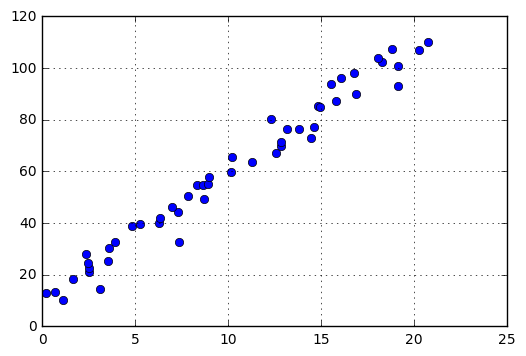

In [29]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

position = np.linspace( 10, 110, 50 ) + randn(50)
velocity = np.linspace( 0, 20, 50 ) + randn(50)
plt.plot(velocity, position,'bo')
plt.grid(True)
print('Mean of readings position is {:.3f}'.format(np.mean(position)))
print('Mean of readings velocity is {:.3f}'.format(np.mean(velocity)))

In [30]:
def predict(posterior, movement):
    x, P = posterior # mean and variance of posterior
    dx, Q = movement # mean and variance of movement
    x = x + dx
    P = P + Q
    return x, P

def update(prior, measurement):
    x, P = prior        # mean and variance of prior
    z, R = measurement  # mean and variance of measurement
    
    y = z - x        # residual
    K = P / (P + R)  # Kalman gain

    x = x + K*y      # posterior
    P = (1 - K) * P    # posterior variance
    return x, P

In [31]:
z_position = np.mean(np.diff(position))
z_velocity = np.mean(np.diff(velocity))

In [32]:
print z_position,z_velocity

2.03447178229 0.400721264234
